# Pneumonia Detection using CNN -- 2nd model -- No augmentation



```
อันนี้คืออันที่ไม่ทำ augmentation และใช้ class_weight ด้วย แต่ใช้ข้อมูลทั้งหมด
```


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
from skimage.io import imread
from skimage.io import imshow
import matplotlib.pyplot as plt
import seaborn as sns

## 1. **Data exploration** 📊

**❗❓หมายเหตุ:**

ข้อมูล DataFrame ทั้งหมด ใน 1. Data exploration นี้ ใช้เฉพาะการ Data exploration เท่านั้นนะคะ ไม่ได้ใช้สำหรับการ Preprocess data และ Train Model

### 1.1 Training set

#### Normal train set




In [3]:
normal_train_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/train/NORMAL/'

# list ชื่อไฟล์ที่อยู่ใน normal_train_directory
normal_train_images = os.listdir(normal_train_directory)

normal_train_label = []

# ใส่ label ให้กับข้อมูล
for file in normal_train_images:
  normal_train_label.append('Normal')

# สร้าง dataframe ของ normal_train_df
normal_train_df = pd.DataFrame({
    'image': normal_train_images,
    'label': normal_train_label
})

normal_train_df.sample(5)

,image,label
617,NORMAL2-IM-0900-0001.jpeg,Normal
341,NORMAL2-IM-0499-0001.jpeg,Normal
685,NORMAL2-IM-0995-0001.jpeg,Normal
145,IM-0652-0001.jpeg,Normal
560,NORMAL2-IM-0862-0001.jpeg,Normal


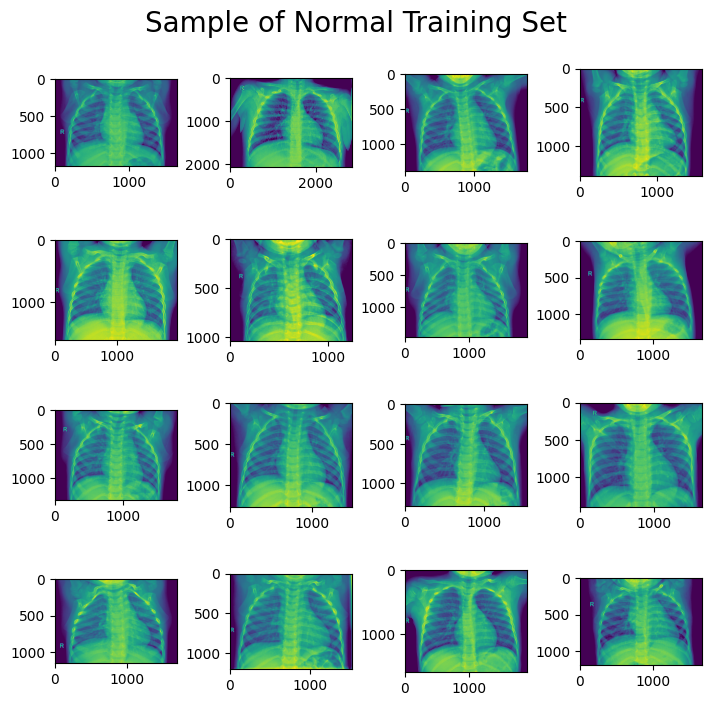

In [4]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Normal Training Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in normal_train_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(normal_train_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


#### Pneumonia train set

In [5]:
pneumonia_train_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/train/PNEUMONIA/'

# list ชื่อไฟล์ที่อยู่ใน pneumonia_train_directory
pneumonia_train_images = os.listdir(pneumonia_train_directory)

pneumonia_train_label = []

# ใส่ label ให้กับข้อมูล
for file in pneumonia_train_images:
  pneumonia_train_label.append('Pneumonia')

# สร้าง dataframe ของ pneumonia_train_df
pneumonia_train_df = pd.DataFrame({
    'image': pneumonia_train_images,
    'label': pneumonia_train_label
})

pneumonia_train_df.sample(5)

,image,label
701,person567_virus_1107.jpeg,Pneumonia
1797,person33_bacteria_174.jpeg,Pneumonia
3195,person1121_virus_1846.jpeg,Pneumonia
2308,person1290_virus_2216.jpeg,Pneumonia
1208,person1858_bacteria_4730.jpeg,Pneumonia


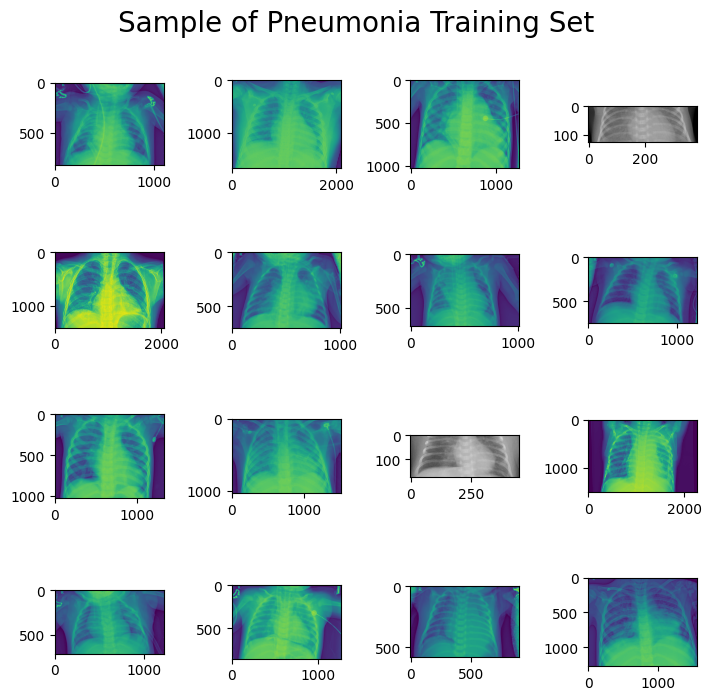

In [6]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Pneumonia Training Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in pneumonia_train_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(pneumonia_train_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


In [7]:
print('Total Normal and Pneumonia training set image: ',  int(normal_train_df['label'].value_counts()) +  int(pneumonia_train_df['label'].value_counts()))

Total Normal and Pneumonia training set image:  4710


In [8]:
train_df =  pd.concat([normal_train_df, pneumonia_train_df])
train_df

,image,label
0,IM-0515-0001.jpeg,Normal
1,IM-0517-0001.jpeg,Normal
2,IM-0507-0001.jpeg,Normal
3,IM-0526-0001.jpeg,Normal
4,IM-0524-0001.jpeg,Normal
...,...,...
3364,person1220_bacteria_3174.jpeg,Pneumonia
3365,person1175_virus_1981.jpeg,Pneumonia
3366,person1211_bacteria_3163.jpeg,Pneumonia
3367,person1220_virus_2068.jpeg,Pneumonia


[Text(0.5, 1.0, 'No. of training set image')]

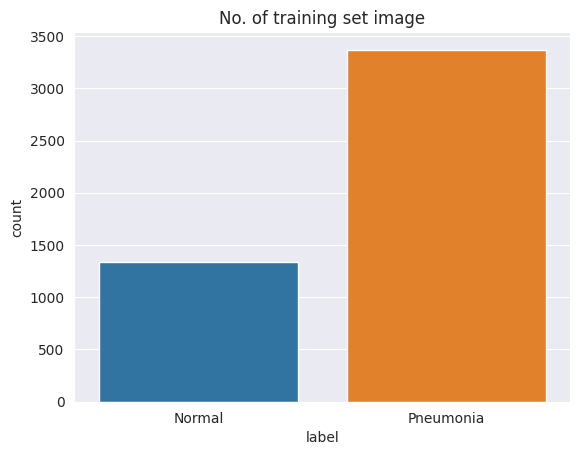

In [9]:
sns.set_style('darkgrid')
sns.countplot(train_df, x="label").set(title='No. of training set image')

ใน training set จะเห็นว่า normal มีจำนวนน้อยกว่า pneumonia มาก ๆ

### 1.2 Test set

#### Normal test set




In [10]:
normal_test_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/test/NORMAL/'

# list ชื่อไฟล์ที่อยู่ใน normal_test_directory
normal_test_images = os.listdir(normal_test_directory)

normal_test_label = []

# ใส่ label ให้กับข้อมูล
for file in normal_test_images:
  normal_test_label.append('Normal')

# สร้าง dataframe ของ normal_test_df
normal_test_df = pd.DataFrame({
    'image': normal_test_images,
    'label': normal_test_label
})

normal_test_df.sample(5)

,image,label
14,IM-0001-0001.jpeg,Normal
65,IM-0063-0001.jpeg,Normal
198,NORMAL2-IM-0280-0001.jpeg,Normal
152,NORMAL2-IM-0327-0001.jpeg,Normal
129,NORMAL2-IM-0081-0001.jpeg,Normal


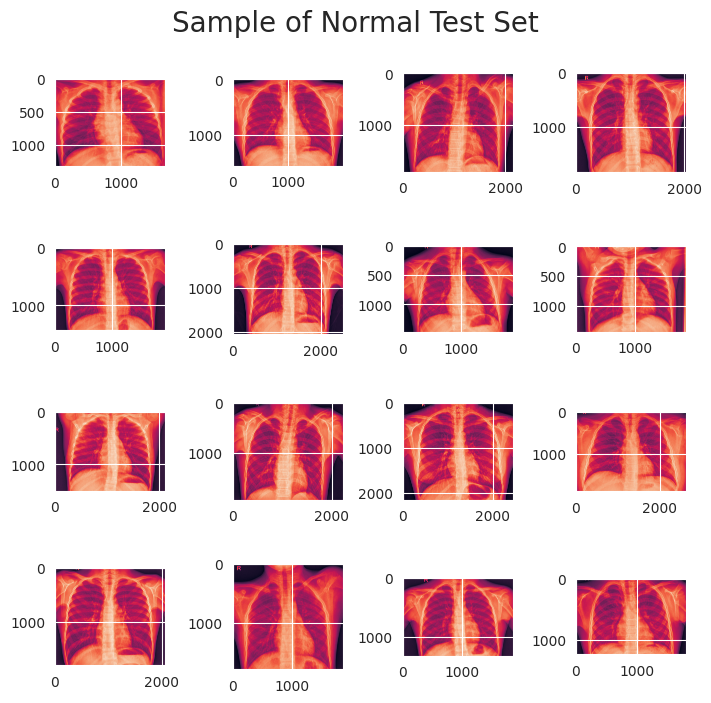

In [11]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Normal Test Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in normal_test_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(normal_test_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


#### Pneumonia train set

In [12]:
pneumonia_test_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/test/PNEUMONIA/'

# list ชื่อไฟล์ที่อยู่ใน pneumonia_test_directory
pneumonia_test_images = os.listdir(pneumonia_test_directory)

pneumonia_test_label = []

# ใส่ label ให้กับข้อมูล
for file in pneumonia_test_images:
  pneumonia_test_label.append('Pneumonia')

# สร้าง dataframe ของ pneumonia_test_df
pneumonia_test_df = pd.DataFrame({
    'image': pneumonia_test_images,
    'label': pneumonia_test_label
})

pneumonia_test_df.sample(5)

,image,label
74,person159_bacteria_746.jpeg,Pneumonia
223,person54_virus_109.jpeg,Pneumonia
381,person90_bacteria_442.jpeg,Pneumonia
13,person141_bacteria_670.jpeg,Pneumonia
359,person1685_virus_2903.jpeg,Pneumonia


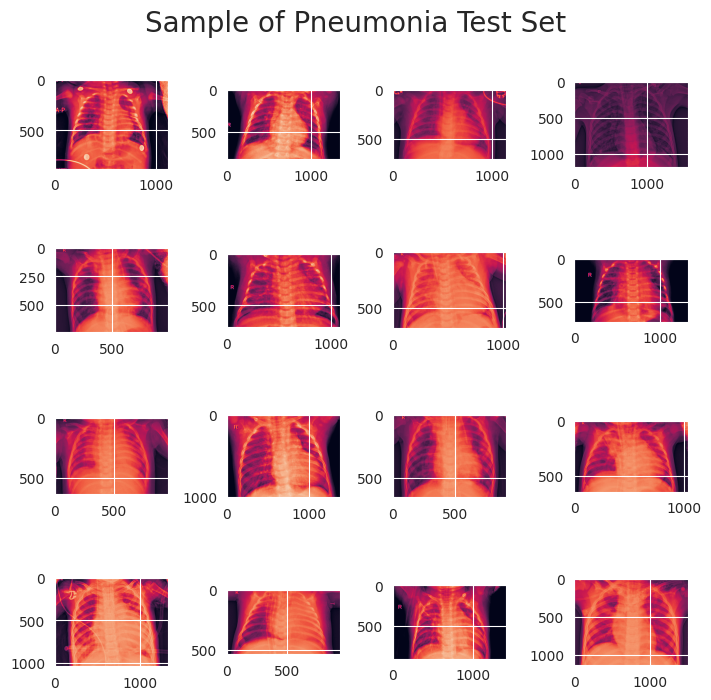

In [13]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Pneumonia Test Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in pneumonia_test_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(pneumonia_test_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


In [14]:
print('Total Normal and Pneumonia test set image: ',  int(normal_test_df['label'].value_counts()) +  int(pneumonia_test_df['label'].value_counts()))

Total Normal and Pneumonia test set image:  624


In [15]:
test_df =  pd.concat([normal_test_df, pneumonia_test_df])
test_df

,image,label
0,IM-0006-0001.jpeg,Normal
1,IM-0017-0001.jpeg,Normal
2,IM-0011-0001-0001.jpeg,Normal
3,IM-0005-0001.jpeg,Normal
4,IM-0019-0001.jpeg,Normal
...,...,...
385,person1656_virus_2862.jpeg,Pneumonia
386,person83_bacteria_412.jpeg,Pneumonia
387,person1665_virus_2878.jpeg,Pneumonia
388,person82_bacteria_402.jpeg,Pneumonia


[Text(0.5, 1.0, 'No. of test set image')]

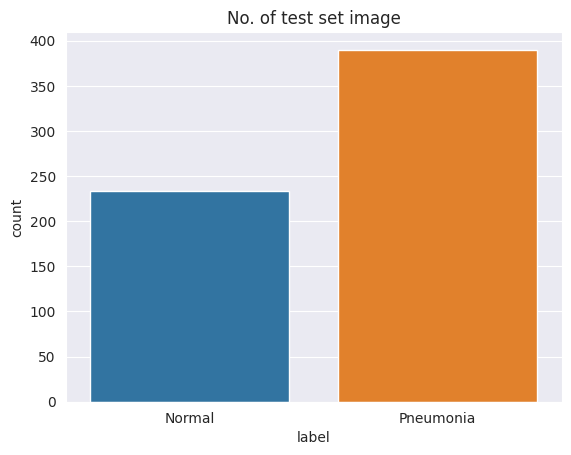

In [16]:
sns.set_style('darkgrid')
sns.countplot(test_df, x="label").set(title='No. of test set image')

ส่วนใน test set จะเห็นว่า normal ก็ยังมีจำนวนน้อยกว่า pneumonia

## **2. Preprocess data** 📑

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**ทำ data augmentation** โดยเพิ่มรายละเอียดใน ImageDataGenerator ดังต่อไปนี้ ซึ่งจะทำ data augmentation เฉพาะใน train set เท่านั้น ใน val และ test set จะไม่ได้ทำ เพราะเราต้องการทดสอบกับข้อมูลจริง ๆ (real-word data)

In [18]:
base_directory='/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/'

train_normal=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/train/NORMAL/')
train_pneumonia=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/train/PNEUMONIA/')

val_dir_normal=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/NORMAL/')
val_dir_pneumonia=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/PNEUMONIA/')

test_dir_normal=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/test/NORMAL/')
test_dir_pneumonia=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/test/PNEUMONIA/')

In [19]:
train_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/train'
val_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val'
test_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/test'

In [20]:
target_img_shape=(64, 64) # ขนาดภาพ input เข้าสู่โมเดล (WxH)

train_datagen = ImageDataGenerator(rescale = 1./255)

# train_datagen = ImageDataGenerator(rescale = 1./255, # กำหนด Normalize pixel
#                                     rotation_range=30, # มุมหมุน +- 30
#                                     width_shift_range=0.2, # ระเลื่อนแนวนอน +- 0.2
#                                     height_shift_range=0.2, # ระเลื่อนแนวดิ่ง +- 0.2
#                                     shear_range=0.2, # การเฉือน
#                                     zoom_range=0.2, # ค่าซูม
#                                     horizontal_flip=True, # พลิกแนวนอน
#                                     fill_mode='nearest' # โหมดในการเติม pixel ภาพ
#                                    )

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32,
                                                 class_mode='binary')

Found 4710 images belonging to 2 classes.


In [21]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 16 images belonging to 2 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 624 images belonging to 2 classes.


In [23]:
# สรุปแบบดูง่ายขึ้น
print('Training:')
ids, counts = np.unique(train_set.classes, return_counts=True)

labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

Training:
NORMAL = 1341
PNEUMONIA = 3369


In [24]:
# สรุปแบบดูง่ายขึ้น
print('Validation:')
ids, counts = np.unique(val_set.classes, return_counts=True)

labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

Validation:
NORMAL = 8
PNEUMONIA = 8


In [25]:
# สรุปแบบดูง่ายขึ้น
print('Test:')
ids, counts = np.unique(test_set.classes, return_counts=True)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

Test:
NORMAL = 234
PNEUMONIA = 390


### ใช้ class weights

In [26]:
y_train_temp=[]

for i in range(len(train_normal)):
    y_train_temp.append(0)

for i in range(len(train_pneumonia)):
    y_train_temp.append(1)

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                  classes = np.unique(y_train_temp),
                                                   y = y_train_temp)

In [27]:
class_weights = dict(zip(np.unique(train_set.classes), class_weights))
class_weights

{0: 1.7561521252796422, 1: 0.699020480854853}

### plot ดู ภาพ

In [28]:
train_set[0][0][0].shape

(64, 64, 3)

มีขนาด W,H = 64x64 และมี channel 3 (ภาพสี)

{'NORMAL': 0, 'PNEUMONIA': 1}
(32, 64, 64, 3)
(32,)
class: 1.0


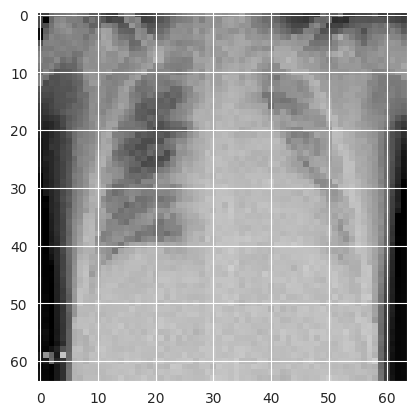

In [29]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    print('class:', labels_batch[0])

    break

แปล:

(32, 64, 64, 3) = ขนาด batch_size 32 ภาพ และภาพมีมิติ 64x64x3

(32,) = จำนวน label ใน batch ซึ่งจะเท่ากับ batch_size เลย

class: 1.0 = ภาพนี้อยู่ class 1 (PNEUMONIA)

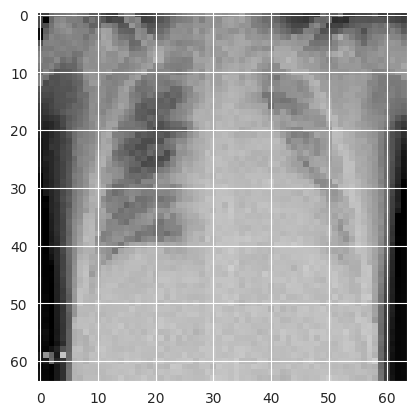

In [30]:
plt.imshow(train_set[0][0][0]) # ดูภาพใน train_set
plt.show()

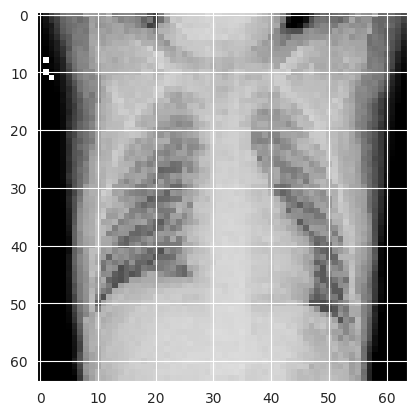

In [31]:
plt.imshow(val_set[0][0][0]) # ดูภาพใน val_set
plt.show()

## **3. Build convolutional neural network 📦**

In [32]:
in_shape=(target_img_shape[0],target_img_shape[1],3)
in_shape

(64, 64, 3)

In [63]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D,
Flatten, Dropout, MaxPool2D )

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 128)        

In [64]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
        ]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

## **4. Train Model 📄**

In [65]:
from keras import callbacks
import time

start = time.time()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) # patience=2 หยุดตั้งแต่ 2 ครั้งแรกถ้าปรับแล้ว loss ไม่ดีขึ้นเลย

history = model.fit(train_set, steps_per_epoch=len(train_set),
                     validation_data = test_set,
                    epochs=20,
                    verbose=1,
                    class_weight=class_weights,
                    callbacks=[early_stop])

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
148/148 [==============================] - 60s 389ms/step - loss: 0.3242 - accuracy: 0.8214 - precision: 0.9485 - recall: 0.7934 - val_loss: 0.8630 - val_accuracy: 0.7484 - val_precision: 0.7161 - val_recall: 0.9897
Epoch 2/20
148/148 [==============================] - 60s 405ms/step - loss: 0.1317 - accuracy: 0.9505 - precision: 0.9801 - recall: 0.9501 - val_loss: 0.6197 - val_accuracy: 0.7933 - val_precision: 0.7574 - val_recall: 0.9846
Epoch 3/20
148/148 [==============================] - 57s 383ms/step - loss: 0.0930 - accuracy: 0.9622 - precision: 0.9857 - recall: 0.9611 - val_loss: 0.4905 - val_accuracy: 0.8157 - val_precision: 0.7859 - val_recall: 0.9692
Epoch 4/20
148/148 [==============================] - 57s 382ms/step - loss: 0.0742 - accuracy: 0.9728 - precision: 0.9909 - recall: 0.9709 - val_loss: 0.7486 - val_accuracy: 0.7837 - val_precision: 0.7495 - val_recall: 0.9821
Epoch 5/20
148/148 [==============================] - 58s 393ms/step - loss: 0.0731 - accura

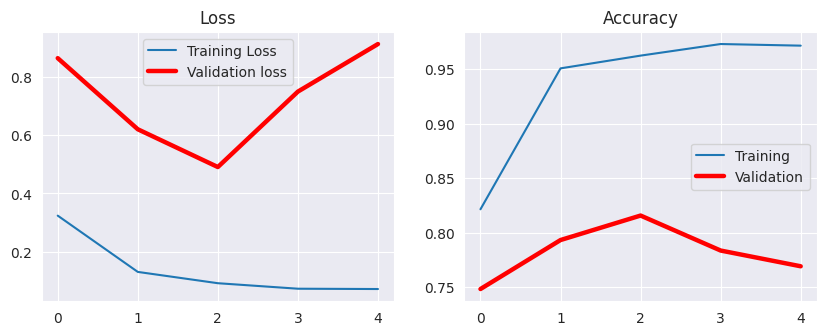

In [66]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

## **5. Evaluate Model ✅**

In [67]:
predict=model.evaluate(test_set)

20/20 [==============================] - 5s 252ms/step - loss: 0.9113 - accuracy: 0.7692 - precision: 0.7338 - recall: 0.9897




---



## **ลองทำนายกับรูปอื่น ๆ ดู**

### แบบ load รูปทีละรูป

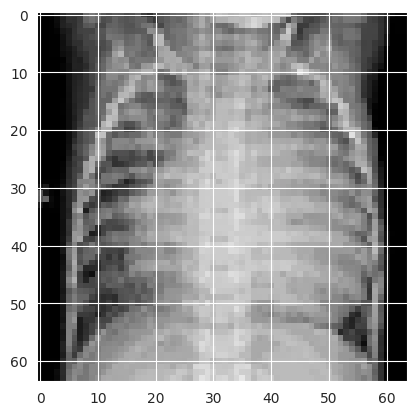

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape=(64, 64) # กำหนดขนาดข้อมูล input ซึ่งต้องเท่ากับตอนสร้าง model

test_image = image.load_img('/content/PNEUMONIA.png', target_size=target_img_shape) # อ่านภาพ

test_image = image.img_to_array(test_image) # เปลี่ยนเป็น array
test_image /= 255.0 # normalize ภาพ

plt.tight_layout()
plt.imshow(test_image) # แสดงภาพ
plt.show()

In [72]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [73]:
# ทำนายกับภาพด้านบน
result = model.predict(test_image)
result

1/1 [==============================] - 0s 22ms/step


array([[0.9999951]], dtype=float32)

เมื่อส่งภาพเข้าไปทำนายจะได้ค่าความน่าจะเป็นระหว่าง 0 ถึง 1

โดยรูปนี้มีค่าความน่าจะเป็นอยู่ที่ 0.9999951 ซึ่งคือ PNEUMONIA
ซึ่งถือว่าทำนายถูกต้อง

In [74]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

- แบบดูง่ายกว่าด้านบน

In [75]:
if result[0][0] > 0.5:
    predict='PNEUMONIA'
else:
    predict='NORMAL'

print(predict)

PNEUMONIA


In [76]:
cls = 'PNEUMONIA' if result[0][0] > 0.5 else 'NORMAL'
cls

'PNEUMONIA'

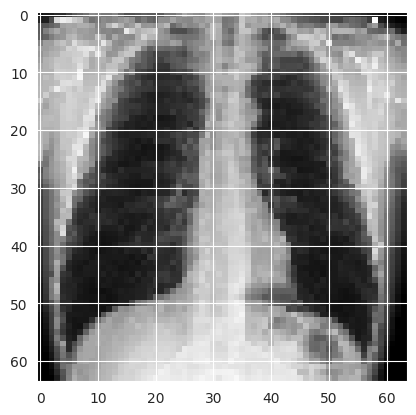

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape=(64, 64) # กำหนดขนาดข้อมูล input ซึ่งต้องเท่ากับตอนสร้าง model

test_image = image.load_img('/content/NORMAL.jpg', target_size=target_img_shape) # อ่านภาพ

test_image = image.img_to_array(test_image) # เปลี่ยนเป็น array
test_image /= 255.0 # normalize ภาพ

plt.tight_layout()
plt.imshow(test_image) # แสดงภาพ
plt.show()

In [70]:
test_image = np.expand_dims(test_image, axis=0)
# test_image.shape

# ทำนายกับภาพด้านบน
result = model.predict(test_image)
result

1/1 [==============================] - 0s 65ms/step


array([[0.004334]], dtype=float32)

เมื่อส่งภาพเข้าไปทำนายจะได้ค่าความน่าจะเป็นระหว่าง 0 ถึง 1

โดยรูปนี้มีค่าความน่าจะเป็นอยู่ที่ 0.004334 ซึ่งคือ NORMAL ซึ่งถือว่าทำนายถูกต้อง

### แบบ load รูปจากทั้ง folder

ภาพที่จะลองมีทั้งหมด 16 ภาพ ประกอบด้วย normal มี 8 ภาพ และ pneumonia มี 8 ภาพ (มาจาก folder val ของชุดข้อมูลนี้ ซึ่งไม่เคยใช้ในตอน train และ test เลย ดังนั้น model จึงไม่เคยเห็นรูปเหล่านี้มาก่อน)

In [77]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_chest_xray(lst):
    y_pred = [] ; y_pred_cls = []; img_lst = []
    for i in lst:

        img = load_img(i, target_size=target_img_shape)
        img = img_to_array(img)
        img /= 255.0


        img_lst.append(img)

        img = np.expand_dims(img, axis=0)

        y_pred_i = model.predict(img)
        y_pred_cls_i = 'PNEUMONIA' if y_pred_i > 0.5 else 'NORMAL' # threshold 0.5

        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred_cls, y_pred

- ลองกับ PNEUMONIA

In [78]:
import glob
import os


mylist = [f for f in glob.glob('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/PNEUMONIA/*')]

img_lst,y_pred_cls,y_pred = predict_chest_xray(mylist)

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 17ms/step
person1952_bacteria_4883.jpeg | person1951_bacteria_4882.jpeg | person1954_bacteria_4886.jpeg | person1946_bacteria_4875.jpeg | person1947_bacteria_4876.jpeg | person1950_bacteria_4881.jpeg | person1949_bacteria_4880.jpeg | person1946_bacteria_4874.jpeg | 

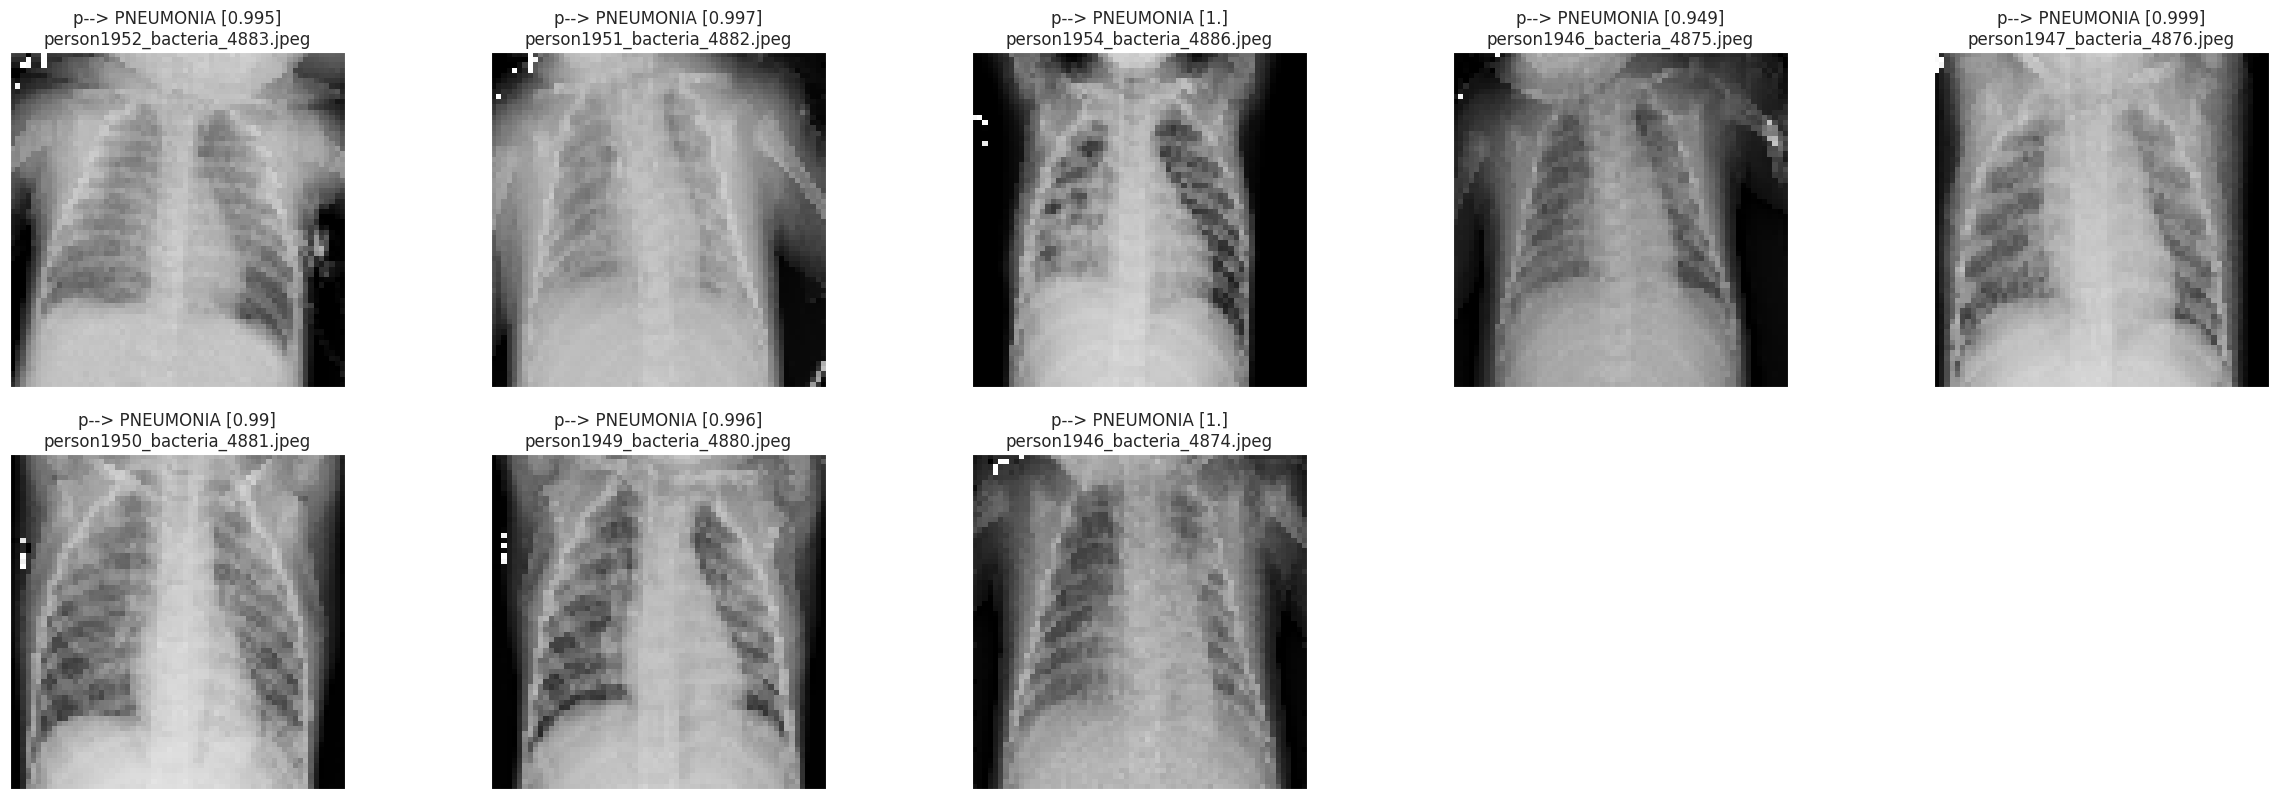

In [79]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()

ตัวอย่างการแปลผลในภาพ: p--> pneumonia [0.859] คือ ทำนายว่าเป็น pneumonia โดยมีความน่าจะเป็นอยู่ที่ 0.859 โดยที่ถ้าค่าความน่าจะเป็นมากกว่า 0.5 จะเป็น pneumonia ถ้าน้อยกว่า 0.5 จะเป็น normal

เมื่อลองทำนายดูกับภาพ PNEUMONIA 8 ภาพ พบว่า model ทำนายได้ถูกต้องทุกภาพเลย

In [80]:
import glob
import os


mylist = [f for f in glob.glob('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/NORMAL/*')]

img_lst,y_pred_cls,y_pred = predict_chest_xray(mylist)

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 25ms/step
NORMAL2-IM-1440-0001.jpeg | NORMAL2-IM-1438-0001.jpeg | NORMAL2-IM-1437-0001.jpeg | NORMAL2-IM-1436-0001.jpeg | NORMAL2-IM-1431-0001.jpeg | NORMAL2-IM-1430-0001.jpeg | NORMAL2-IM-1427-0001.jpeg | NORMAL2-IM-1442-0001.jpeg | 

- ลองกับ NORMAL

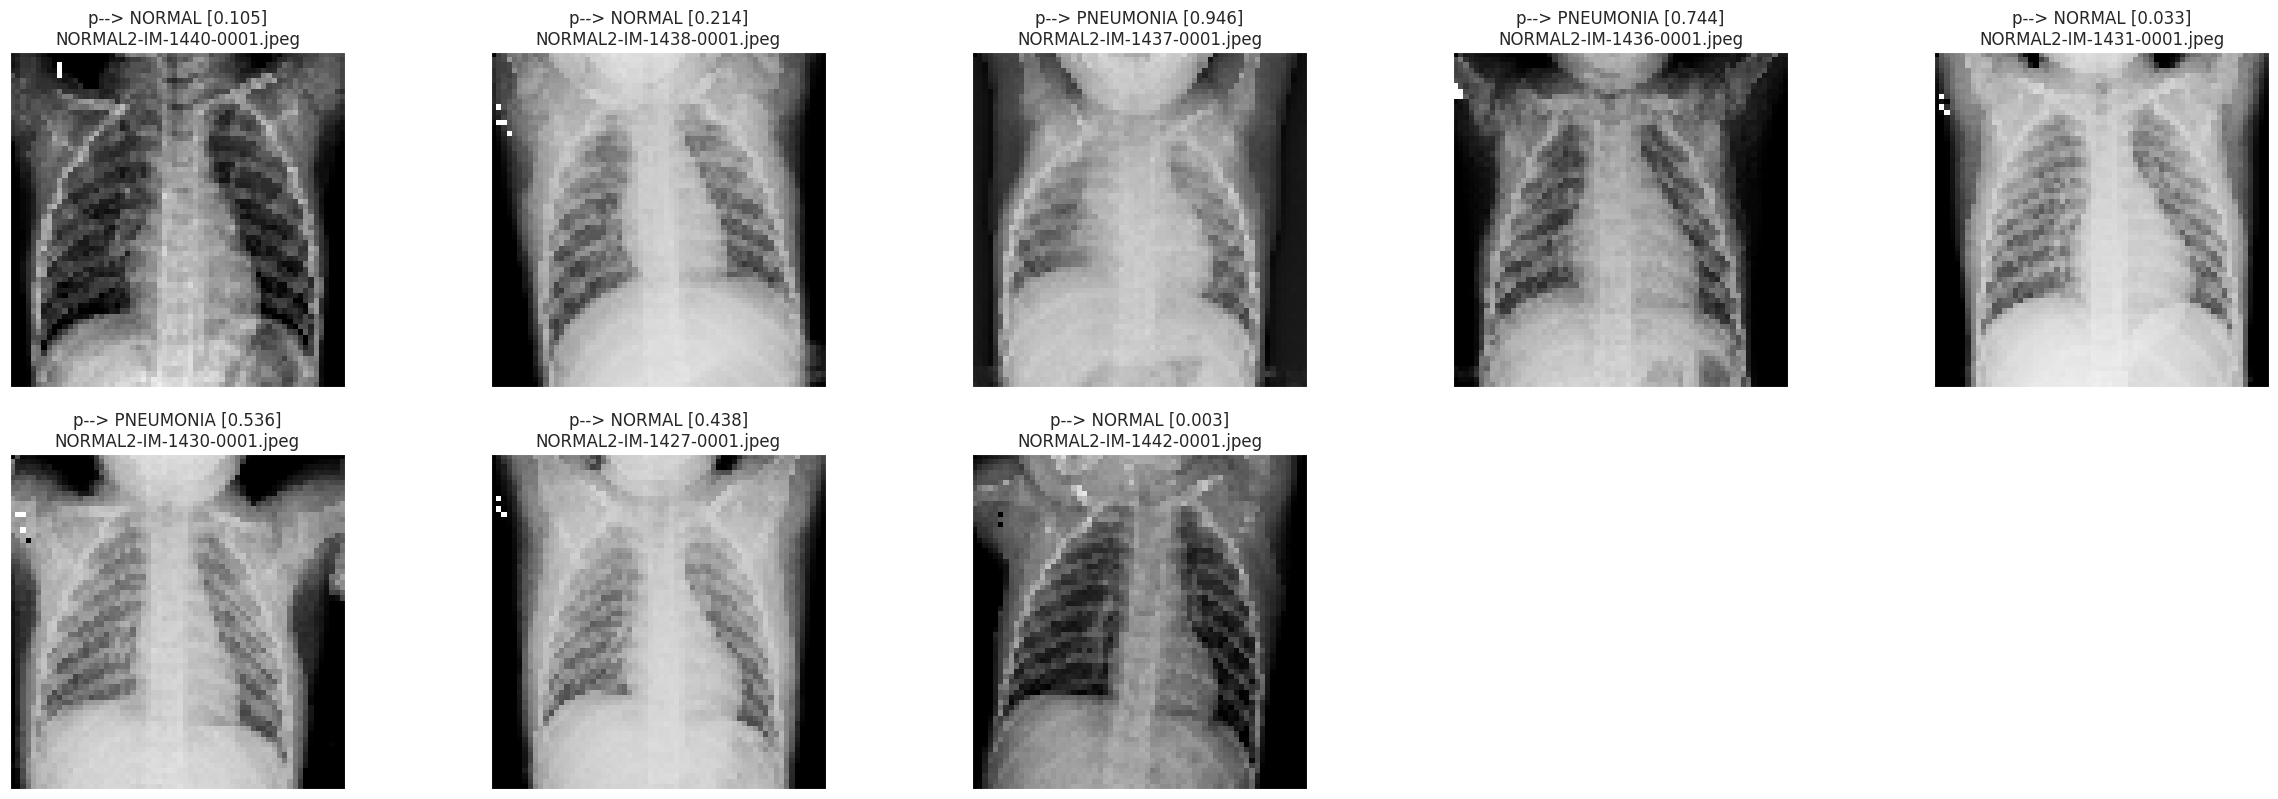

In [81]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()

ตัวอย่างการแปลผลในภาพ: p--> pneumonia [0.859] คือ ทำนายว่าเป็น pneumonia โดยมีความน่าจะเป็นอยู่ที่ 0.859 โดยที่ถ้าค่าความน่าจะเป็นมากกว่า 0.5 จะเป็น pneumonia ถ้าน้อยกว่า 0.5 จะเป็น normal

เมื่อลองทำนายดูกับภาพ Normal 8 ภาพ พบว่า model ทำนายผิด 3 ภาพ



---



## Save model

In [82]:
# save model ไว้ใช้ต่อได้
model.save('pneumonia_3rd.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---

